# Business Case: Walmart - Confidence Interval and CLT

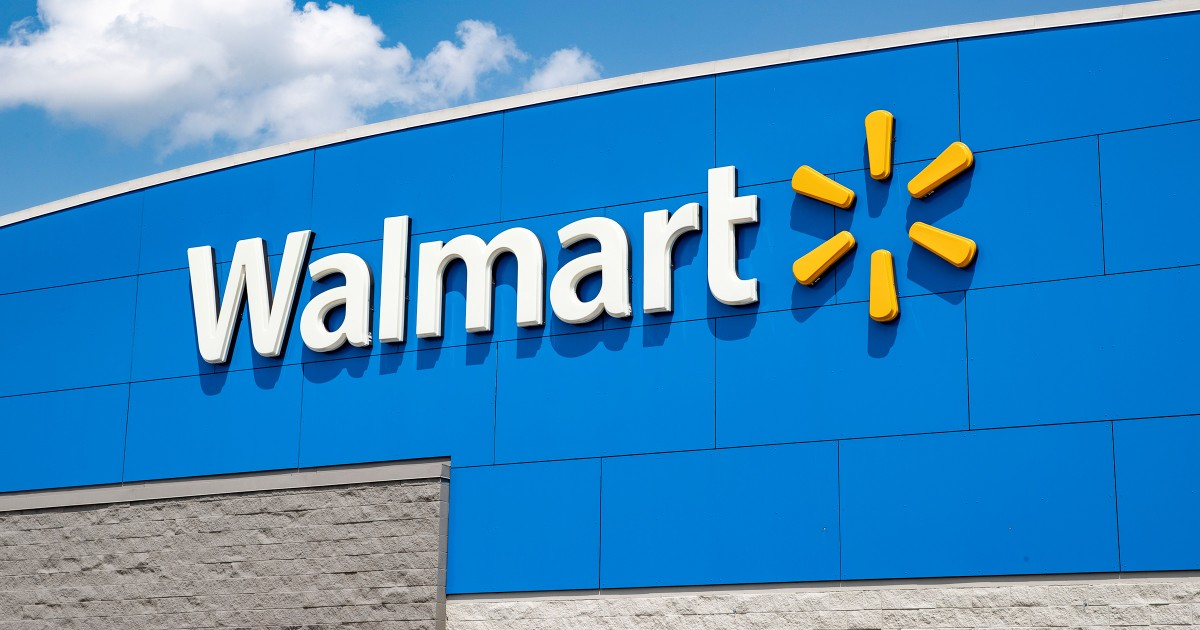

# Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
walmart_df = pd.read_csv('C://Users//dell//OneDrive//Desktop//Personal Doc//original_walmart_data.csv')
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [10]:
walmart_df.shape

(550068, 10)

In [5]:
walmart_df['Marital_Status'].replace({0:"Unmarried",
                            1:"Married"},inplace=True)
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [6]:
walmart_df['Gender'].replace({'F':"Female",
                            'M':"Male"},inplace=True)
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Unmarried,8,7969


In [18]:
walmart_df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [8]:
walmart_df['Age'].value_counts().sort_index()

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [9]:
walmart_df['Gender'].value_counts()

Male      414259
Female    135809
Name: Gender, dtype: int64

In [10]:
walmart_df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [11]:
walmart_df['Product_ID'].value_counts().sort_index()

P00000142    1152
P00000242     376
P00000342     244
P00000442      92
P00000542     149
             ... 
P0099442      200
P0099642       13
P0099742      126
P0099842      102
P0099942       14
Name: Product_ID, Length: 3631, dtype: int64

In [12]:
walmart_df['Product_Category'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

In [13]:
walmart_df['Occupation'].value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [29]:
walmart_df['City_Category'].value_counts().sort_index()

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [30]:
walmart_df['Stay_In_Current_City_Years'].value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [23]:
walmart_df.groupby(["Gender", "Marital_Status"])["Purchase"].count().unstack()

Marital_Status,Married,Unmarried
Gender,,
Female,56988,78821
Male,168349,245910


In [15]:
walmart_df.groupby(["Age", "Marital_Status"])["Purchase"].count().unstack()

Marital_Status,Married,Unmarried
Age,,
0-17,NaN,15102.0
18-25,21116.0,78544.0
26-35,86291.0,133296.0
36-45,43636.0,66377.0
46-50,33011.0,12690.0
51-55,27662.0,10839.0
55+,13621.0,7883.0


In [21]:
# count of number of people at different age groups live in different city
walmart_df.groupby(["Age", "City_Category"])["Gender"].count().unstack()

City_Category,A,B,C
Age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


In [19]:
# count of no. of married and unmarried male female work
walmart_df.groupby(["Marital_Status", "Gender"])["Occupation"].count().unstack()

Gender,Female,Male
Marital_Status,,
Married,56988,168349
Unmarried,78821,245910


In [ ]:
sns.boxplot(walmart_df.describe(), data=walmart_df)
plt.show()